## Inverse noise covariance operators for `litebird_sim`

This notebook shows how to create the inverse noise covariance operators for the BrahMap's interface to `litebird_sim` (LBS). The operators discussed here are essentially the block-diagonal operators where each block corresponds to one observation instance of a detector. That means, it assumes that there is no noise correlation between different observation instance and different detectors.

Similar to other inverse covariance operators, all the operators discussed here provide a `diag` attribute, which retrieves the diagonal elements of the operator, and a `get_inverse()` method that returns the inverse of the operator. For LBS, while we provide the interface only for inverse covariances, it is possible to obtain covariance operator using `get_inverse()` method.

All LBS inverse covariance operators are defined locally. This means that, for consistency, the user must ensure that the inverse noise covariance defined on each MPI process corresponds to the TOD available locally on that process. Additionally, the user must ensure that the order of the blocks in the operator corresponds to the order of the TODs of different observations and detectors - as it is processed with `LBSimProcessTimeSamples`.

In addition to the operators discussed here, it is possible to create block-diagonal inverse covariance operators with different types of blocks. One can use `brahmap.base.BaseBlockDiagInvNoiseCovLinearOperator()` class for this purpose ensuring that the conditions discussed above hold true. See [examples for the block-diagonal noise covariance](./block_diagonal_noise_covariances.ipynb) for more details.

<div class="alert alert-block alert-warning">

**NOTE**  
The linear operators defined in BrahMap can be visualized using the `brahmap.utilities.plot_LinearOperator()` function. This function requires `matplotlib` to be installed. However, it must be used very carefully, as it allocates a large array in memory - matching the dimensions of the linear operator - which can quickly crash your system. In these examples, we use this function because our operators are very small.

</div>


In [ ]:
### If you are using Google Colab, uncomment the following line and execute this cell to install the required packages

# %pip install matplotlib healpy litebird_sim git+https://github.com/anand-avinash/BrahMap.git

In [1]:
import tempfile
import numpy as np
import litebird_sim as lbs
import brahmap
from brahmap.utilities import plot_LinearOperator

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [2]:
### Creating a basic LBS simulation

tmp_dir = tempfile.TemporaryDirectory().name

sim = lbs.Simulation(
    base_path=tmp_dir,
    start_time=45,
    duration_s=71,
    random_seed=154,
)

detector_list = [
    lbs.DetectorInfo(name="det1", sampling_rate_hz=1, net_ukrts=1.5),
    lbs.DetectorInfo(name="det2", sampling_rate_hz=1, net_ukrts=2.9),
    lbs.DetectorInfo(name="det3", sampling_rate_hz=1, net_ukrts=3.6),
    lbs.DetectorInfo(name="det4", sampling_rate_hz=1, net_ukrts=4.2),
]

sim.create_observations(
    detectors=detector_list,
    num_of_obs_per_detector=3,
    n_blocks_det=1,
    n_blocks_time=1,
    split_list_over_processes=False,
)

### Inverse noise covariance with diagonal covariance blocks

The inverse noise covariance operator with diagonal covariance blocks can be defined using `LBSim_InvNoiseCovLO_UnCorr()` class with the following arguments:

- `obs`  
    An instance or a list of instances of the `Observation` class
- `noise_variance`  
    When `noise_variance` is `None` (default), it uses the noise properties stored in `obs` to create the inverse operators. Otherwise, it accepts a dictionary that maps the detector name to their noise variance. If a detector name is missing in the dictionary, its variance is assigned as 1 by default.
- `dtype`  
    The data-type of the linear operator

[2025-06-27 20:45:40,533 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:40,535 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:40,537 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:40,538 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:40,540 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:40,542 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:40,543 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:40,544 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:40,545 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:40,546 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:40,547 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:40,548 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:40,549 INFO MPI#0000] 

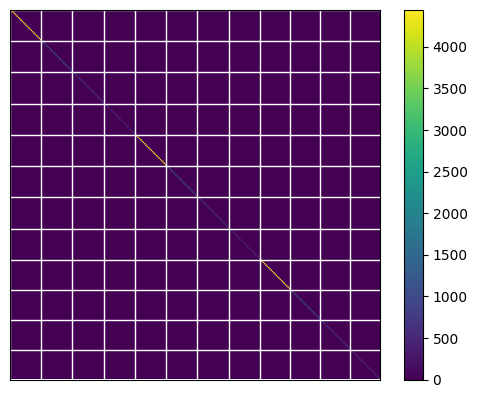

In [3]:
### Example 1: With `noise_Variance = None`

# Creating the inverse noise covariance operator
inv_diag_cov1 = brahmap.LBSim_InvNoiseCovLO_UnCorr(
    obs=sim.observations,
    noise_variance=None,
    dtype=np.float32,
)


# Visualizing the operator
plot_LinearOperator(inv_diag_cov1)

Note that the number of blocks in the linear operator is 12, that is same as the number of observations per detector times number of detectors.

[2025-06-27 20:45:42,192 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:42,194 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:42,196 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:42,198 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:42,199 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:42,201 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:42,202 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:42,203 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:42,205 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:42,207 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:42,208 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:42,209 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:42,210 INFO MPI#0000] 

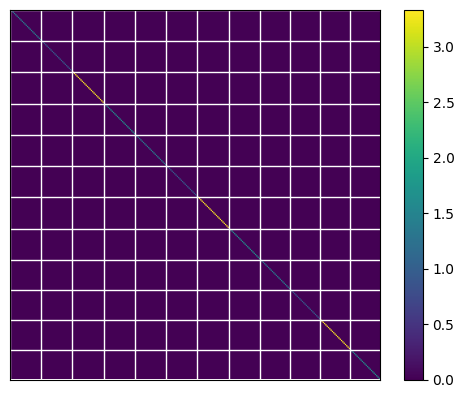

In [4]:
### Example 2: `noise_variance` is specified explicitly

# Creating the noise variance dictionary
noise_variance_dict = {
    "det1": 0.7,
    # "det2", # the operator should set it to 1.0 by default
    "det3": 0.3,
    "det4": 0.6,
}


# Creating the inverse noise covariance operator
inv_diag_cov2 = brahmap.LBSim_InvNoiseCovLO_UnCorr(
    obs=sim.observations,
    noise_variance=noise_variance_dict,
    dtype=np.float32,
)


# Visualizing the operator
plot_LinearOperator(inv_diag_cov2)

### Inverse noise covariance with circulant covariance blocks

The inverse noise covariance operator with circulant covariance blocks can be defined using `LBSim_InvNoiseCovLO_Circulant` class with the following arguments:

- `obs`  
    An instance or a list of the `Observation` class
- `input`  
    A dictionary or a 1-d numpy array containing the noise properties of the detectors in terms of noise covariance or power spectrum. When it is a dictionary, it should map the name of the detector to their noise properties. When the argument is a 1-d numpy array, it is considered as the noise property that is common to all the detectors.
- `input_type`  
    The name of the noise property. If `input` argument contains the noise covariances, `input_type` must be `"covariance"`. Likewise, if the `input` argument contains the power spectrum arrays, the `input_type` must be `power_spectrum`.
- `dtype`  
    The data-type of the linear operator

[2025-06-27 20:45:43,911 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:43,912 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:43,914 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:43,915 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:43,916 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:43,920 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:43,921 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:43,923 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:43,925 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:43,927 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:43,928 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:43,933 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:43,935 INFO MPI#0000] 

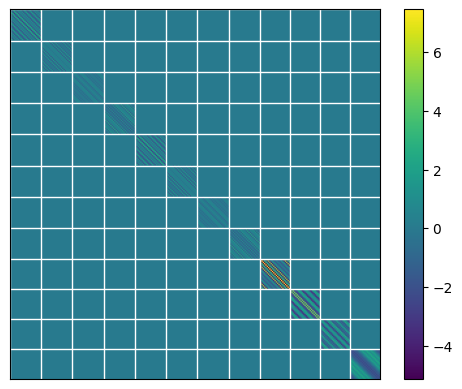

In [5]:
### Example 1: `input` argument is a dictionary

# Creating a dictionary of circulant power spectrum
ps_dict_circ = {}

rng_circ = np.random.default_rng(seed=4551)
for detector in detector_list:
    cov_circ = rng_circ.random(size=sim.observations[0].n_samples)
    ps_circ = np.fft.fft(cov_circ).real

    cov_circ = np.fft.ifft(ps_circ).real
    ps_circ = np.fft.fft(cov_circ).real

    ps_dict_circ[detector.name] = ps_circ


# Creating the inverse noise covariance operator
inv_circ_cov1 = brahmap.LBSim_InvNoiseCovLO_Circulant(
    obs=sim.observations,
    input=ps_dict_circ,
    input_type="power_spectrum",
    dtype=np.float32,
)


# Visualizing the operator
plot_LinearOperator(inv_circ_cov1)

[2025-06-27 20:45:44,585 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:44,588 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:44,589 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:44,591 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:44,593 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:44,594 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:44,596 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:44,599 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:44,601 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:44,603 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:44,605 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:44,606 INFO MPI#0000] New linear operator with shape (23, 23)
[2025-06-27 20:45:44,608 INFO MPI#0000] 

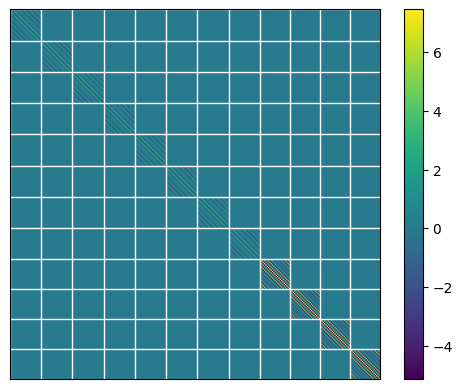

In [6]:
### Example 2: `input` argument is a 1-d numpy array

# Creating a circulant power spectrum array
ps_circ2 = ps_dict_circ["det1"]

# Creating the inverse noise covariance operator
inv_circ_cov2 = brahmap.LBSim_InvNoiseCovLO_Circulant(
    obs=sim.observations,
    input=ps_circ2,
    input_type="power_spectrum",
    dtype=np.float32,
)


# Visualizing the operator
plot_LinearOperator(inv_circ_cov2)

In the two examples above, it can be seen that the last four blocks have considerably different inverse covariance. Since the shape of these four blocks is different than the shape of previous eight blocks, the input power spectrum has been reshaped/re-computed, resulting in a different inverse covariance. The shape of the operators can be verified as given below:

In [7]:
print("size of the rows of the blocks: ", inv_circ_cov1.col_size)
print("size of the columns of the blocks: ", inv_circ_cov1.col_size)

size of the rows of the blocks:  [24 24 24 24 24 24 24 24 23 23 23 23]
size of the columns of the blocks:  [24 24 24 24 24 24 24 24 23 23 23 23]


In [8]:
### Length of the different observations for different detectors

obs_size = []
for obs in sim.observations:
    for detector in obs.name:
        obs_size.append(obs.n_samples)

print("size of the different observations for different detectors:\n ", obs_size)

size of the different observations for different detectors:
  [24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23]


### Inverse noise covariance with Toeplitz covariance blocks

The inverse noise covariance operator with Toeplitz covariance blocks can be defined using `LBSim_InvNoiseCovLO_Toeplitz` class with the following arguments:

- `obs`  
    An instance or a list of the `Observation` class
- `input`  
    A dictionary or a 1-d numpy array containing the noise properties of the detectors in terms of noise covariance or power spectrum. When it is a dictionary, it should map the name of the detector to their noise properties. When the argument is a 1-d numpy array, it is considered as the noise property that is common to all the detectors.
- `input_type`  
    The name of the noise property. If `input` argument contains the noise covariances, `input_type` must be `"covariance"`. Likewise, if the `input` argument contains the power spectrum arrays, the `input_type` must be `power_spectrum`.
- `operator`  
    The operator class to be used for individual inverse Toeplitz operators. It is `InvNoiseCovLO_Toeplitz01` by default.
- `dtype`  
    The data-type of the linear operator

[2025-06-27 20:45:45,450 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,452 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,455 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,456 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,458 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,459 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,461 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,463 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,465 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,466 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,468 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,470 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:45,472 INFO MPI#0000] 

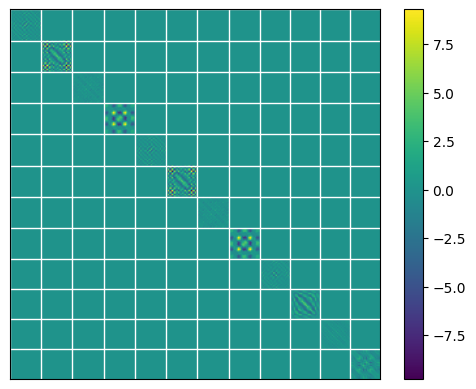

In [9]:
### Example 1: `input` argument is a dictionary

# Creating a dictionary of power spectrum
ps_dict_toep = {}

rng_toep = np.random.default_rng(seed=4551)
for detector in detector_list:
    cov_toep = rng_toep.random(size=sim.observations[0].n_samples)
    extended_cov_toep = np.concatenate([cov_toep, cov_toep[1:-1][::-1]])
    ps_toep = np.fft.fft(extended_cov_toep).real

    ps_dict_toep[detector.name] = ps_toep


# Creating the inverse noise covariance operator
inv_toep_cov1 = brahmap.LBSim_InvNoiseCovLO_Toeplitz(
    obs=sim.observations,
    input=ps_dict_toep,
    input_type="power_spectrum",
    dtype=np.float32,
)


# Visualizing the operator
plot_LinearOperator(inv_toep_cov1)

[2025-06-27 20:45:58,437 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,438 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,439 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,440 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,442 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,444 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,446 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,447 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,449 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,450 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,454 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,455 INFO MPI#0000] New linear operator with shape (24, 24)
[2025-06-27 20:45:58,457 INFO MPI#0000] 

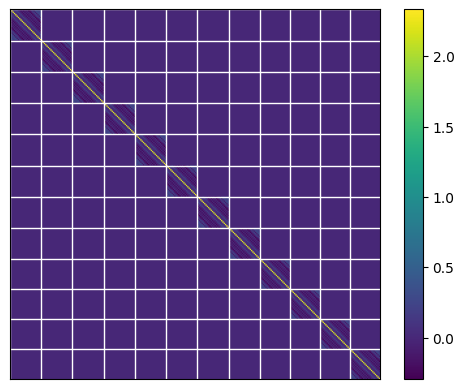

In [10]:
### Example 2: `input` argument is a 1-d numpy array

# Creating the inverse noise covariance operator
inv_toep_cov2 = brahmap.LBSim_InvNoiseCovLO_Toeplitz(
    obs=sim.observations,
    input=rng_toep.random(size=sim.observations[0].n_samples * 2 - 1),
    input_type="power_spectrum",
    dtype=np.float32,
)


# Visualizing the operator
plot_LinearOperator(inv_toep_cov2)